<a href="http://www.unioeste.br"><img src="https://www5.unioeste.br/portalunioeste/templates/tlpcampus/images/logoUnioeste.png" align="right"></a>

<h1><center>Atividade Prática em R - Amostragem e Reamostragem Bootstrap</center></h1>

<center>Prof.Dr. Plinio Andrade</center>

### Nesta atividade prática você irá:

* Recordar como selecionar elementos aleatoriamente de um vetor de números;
* entender como podemos utilizar o R em um plano de amostragem probabilística;
* entender como podemos tomar decisões se podemos simular facilmente de uma população;
* conhecer o método de reamostragem Bootstrap.

<b> <font color='red'>ATENÇÃO!</font></b> sempre que este notebook for reaberto você deverá executar todas as células de código novamente. Cada célula **ativa** é executada pressionando o botão <b>Run</b> no menu da parte superior da tela, ou teclando <b>Ctrl+Enter</b>. Caso esteja utilizando um smartphone ou tablet, cada célula terá um botão ao lado para ser executada. Persistindo dúvidas, assista novamente o video de apresentação sobre notebooks.

## 1) Amostragem Probabilística

Quando utilizamos amostragem probabilística, vimos que todas as técnicas apresentadas dependem sempre de se conduzir uma Amostragem Aleatória Simples em algum momento. Já vimos anteriormente como sortear valores de uma lista de valores no R por meio da função ```sample()```. Por exemplo, se queremos sortear 3 valores **sem reposição** de um lista numerada de 1 a 10, podemos proceder como segue:

In [ ]:
sample(c(1,2,3,4,5,6,7,8,9,10), 3)

Se a lista for muito grande podemos criar uma sequência de maneira mais prática como na célula a seguir:

In [ ]:
sample(1:10, 3)

In [ ]:
x = c("maria", "joao", "paulo", "carla", "rosa")
sample(x, 2)

Se o objetivo é amostrar **com reposição** devemos incluir o argumento ```rep = TRUE```, como mostra a célula abaixo:

In [ ]:
sample(1:10, 3, rep = TRUE)

As possibilidades são várias. Para não entrarmos muito na questão computacional, vamos ilustrar como podemos explorar o uso da função ```sample()``` resolvendo um problema prático.

### Exemplo 1

Suponha que se queira estudar o número de cômodos de domicílios de um bairro. Considere o mapa da figura abaixo:

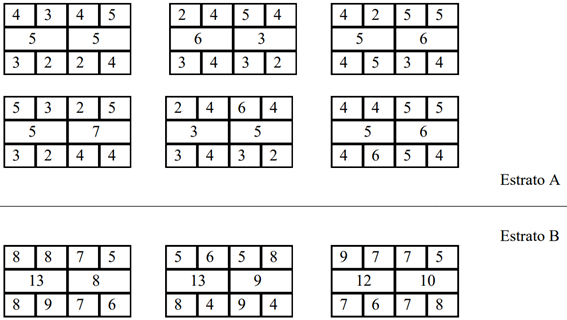

Os retângulos maiores representam quarteirões que foram divididos em duas localidades (estratos). Os retângulos menores representam domicílios de cada quarteirão e os números que aparecerem em cada um desses retângulos correspondem ao número de cômodos de cada domicílio.

a)	Obtenha uma amostra aleatória simples de 9 domicílios, ou seja, ignore os estratos. Anote o número de cômodos dos domicílios selecionados na amostra.

b)	Repita o item (a) para uma amostra estratificada com alocação proporcional.

c)	Repita o item (a) conduzindo uma amostragem por conglomerados em dois estágios. No primeiro selecione 3 quarteirões e no segundo 3 domicílios.

### Solução

a) Neste caso, podemos simplesmente enumerar todas as casas e sorteá-las. Como cada bloco possui 10 casas, devemos sortear de uma lista de valores que vão de 1 a 90.

In [ ]:
sample(1:90, 9)

In [ ]:
sort(sample(1:90, 9))

Para cada número sorteado, podemos ver a quantidade de cômodos correspondentes e anotar seu valores como solicitado. P.ex: Se o primeiro domicício do primeiro quarteirão do primeiro estrato fosse selecionada, o número de cômodos correspondente seria 4.

b) O primero estrato possui 6 quarteirões, ou seja, 60 casas. Restam portanto 30 casas no segundo estrato. Como queremos que a alocação seja proporcional, devemos selecionar 6 casas do primeiro estrato e 3 do segundo.

Se as casas do primeiro estrato forem enumeradas de 1 a 60, as do segundo estrato podem ser enumeradas de 61 a 90. Logo, podemos obter as duas amostras como segue:

In [ ]:
amostra_1 = sample(1:60, 6)   # sorteando do estrato 1 e armazenando os rótulos no vetor amostra_1
amostra_2 = sample(61:90, 3)  # sorteando do estrado 2 e armazenando os rótulos no vetor amostra_2

amostra_1                     # imprimindo os rótulos da amostra_1
amostra_2                     # imprimindo os rótulos da amostra_2

c) Neste caso, podemos primeiramente enumerar os quarteirões de 1 a 9 e sorteá-los, para em seguida sortear os domicílios dos quarteirões escolhidos.

In [ ]:
blocos = sample(1:9, 3)   # selecionando os 3 quarteirões
casas1 = sample(1:10, 3)  # selecionando as casas do primeiro quarteirão
casas2 = sample(11:20, 3) # selecionando as casas do segundo quarteirão
casas3 = sample(21:30, 3) # selecionando as casas do terceiro quarteirão

blocos
casas1
casas2
casas3

In [ ]:
sort(blocos)
sort(casas1)
sort(casas2)
sort(casas3)

## 2) Amostrando de uma População

Podemos conduzir diversas análises estatísticas se pudermos simular de um modelo populacional. Quando este modelo é escolhido, podemos testar se os dados observados dão suporte a essa escolha. Esse procedimento é conhecido como **teste de hipóteses** e será formalizado posteriormente para populações normais (ou aproximadamente normais). Vamos ilustrar com um exemplo.

### Exemplo 2: Suprema corte dos E.U.A. - Swain vs. Alabama (1965)

Wikipedia: https://en.wikipedia.org/wiki/Swain_v._Alabama

No início dos anos 60, no condado de Talladega - Alabama, um homem negro chamado Robert Swain foi condenado pelo estupro de uma mulher e sentenciado à morte. Ele apelou de sua sentença alegando, dentre outros fatores, o fato de haver somente brancos no júri.

Naquele tempo, somente homens com mais de 21 anos podiam compor o júri no Estado do Alabama. Sabia-se que 26% dos jurados elegíveis de Talladega eram negros, mas haviam apenas 8 negros dentre os 100 pontenciais jurados para este julgamento. Dentre os escolhidos, nenhum negro foi selecionado para o julgamento.

Em 1965, a Suprema Corte dos E.U.A. negou o apelo de Swain afirmando que a seleção do júri era aleatória e que a composição final 100% branca foi obra do acaso.

Mas se 26% da população de jurados era negra, ter 8 homens negros dentre os 100 previamente selecionados não parecia refletir a realidade.

Para analisar esse caso, vamos definir uma **hipótese**: o corpo de potenciais jurados foi selecionado ao acaso (aleatóriamente). Em outras palavras, essa hipótese é consistente com a decisão da Suprema Corte. Podemos então proceder da seguinte maneira:

* simular dados (corpos de potenciais jurados) sob a condição da hipótese acima ser verdadeira, ou seja, respeitando a proporção de 26% de jurados negros;
* comparar os resultados das simulações com a proporção observada;
* se os resultados das simulações não forem consistentes com o que foi observado, teremos evidência contra a hipótese formulada.

Em primeiro lugar devemos escolher uma **estatística** (estimador) para simular. Essa estatística deve refletir o que queremos estudar na população. Parece natural utilizar uma estatística que conta o número de homens negros nas amostras de 100 jurados simuladas. Valores pequenos dessa estatística fornecem evidência contra a hipótese de que o júri foi selecionado aleatoriamente.

Vamos então definir uma variável $X$ que assume valor 1 se o indivíduo selecionado é negro e 0 caso contrário. Queremos então obter amostras de 0's e 1's de modo que $\mathbb{P}(X=0)=0,74$ e $\mathbb{P}(X=1)=0,26$. Para isso, podemos novamente contar com a função ```sample()```, mas agora devemos especificar as probabilidades de selecionar cada valor de $X$ utilizando o argumento ```prob = c(0.74, 0.26)``` além do argumento ```rep = TRUE```, pois as amostras deverão ter tamanho 100 cada uma. Vamos testar este comando na célula a seguir:

In [ ]:
amostra = sample(0:1, 100, rep = TRUE, prob = c(0.74, 0.26)) # obtendo a amostra e armazenando no vetor "amostra"
amostra                                                      # imprimindo o vetor

Se quisermos saber a quantidade de negros na amostra simulada (valor da estatística adotada), basta calcular a soma dos elementos da amostra (função ```sum()```). Como a amostra tem tamanho 100, esse valor é a porcentagem de negros na amostra. Execute a célula a seguir:

In [ ]:
sum(amostra)

Vamos repetir essa simulação um número grande de vezes (10.000) e estudar a **distribuição amostral** da estatística escolhida. Utilizaremos um laço de repetição (isso já foi feito antes). Novamente, não se preocupe com a estrutura deste comando, ele serve apenas para repetir o que fizemos nas células acima.

In [ ]:
somas = 0                                                         # criando um vetor vazio para receber as somas simuladas
for(i in 1:10000)
    {
     amostra  =  sample(0:1, 100, rep = TRUE, prob = c(0.74, 0.26)) # obtendo a amostra
     somas[i] = sum(amostra)
    }

Para interpretar os resultados das simulações, vamos obter um histograma das somas simuladas. Tal histograma representa a distribuição das contagens de indivíduos negros caso esses fossem escolhidos aleatóriamente.

In [ ]:
hist(somas)

Voltemos ao nosso problema. Vimos que o número de negros pré-selecionados para o júri foi 8 dentre 100. Você consegue identificar onde esse ponto se encontra no histograma? Vamos fazer um novo histograma (não se preocupe com os códigos para a formatação):

In [ ]:
hist(somas, xlim = c(0,50))
points(8,0, col = "red", pch = 16)

Isso mesmo! Lembre-se que o histograma é uma representação de uma distribuição de probabilidades. O ponto em vermelho (valor observado: 8 negros em 100) está na cauda da distribuição, isto é, possui probabilidade praticamente nula de acontecer.

A simulação mostra que se na época fosse selecionado um painel de 100 potenciais jurados aleatoriamente da população elegível, era muito improvável de se obter contagens de homens negros tão baixas quanto os oito que estavam no painel do júri de Swain. Isso é uma evidência de que a hipótese de seleção aleatória dos jurados do painel não é consistente com os dados observados.

Quando os dados observados e uma hipótese (ou modelo) são inconsistentes, tal hipótese é difícil de justificar. Afinal, os dados são reais enquanto uma hipótese é apenas um conjunto de suposições. Quando as suposições estão em desacordo com a realidade, temos que questionar essas suposições.

Embora seja **possível** que um painel como o de Robert Swain tenha sido gerado por acaso, a simulação demonstra que isso é muito improvável. Portanto, podemos concluir que a hipótese de sorteios aleatórios não é suportado pelas evidências. O painel do júri de Swain não parece o resultado de uma amostra aleatória da população de jurados elegíveis.

**Pergunta**: Você consegue calcular a probabilidade **exata** de haver apenas 8 homens negros dentre os 100 sob a suposição da hipótese de seleção aleatória ser verdadeira?

## 3) Técnica de Reamostragem  - Bootstrap

Bootstrap é um procedimento estatístico que consiste em extrair amostras com reposição de um conjunto de dados para produzir várias amostras simuladas. Desse modo, é possível conduzir diversas análises estatísticas quando métodos tradicionais não podem ou não devem ser utilizados. Essa abordagem não assume nada sobre a população em estudo e, embora produza resultados menos precisos (para dados de baixa dimensão), são simples em sua compreensão e de fácil implementação. Vamos ilustrar esse procedimento no próximo exercício.

### Exercício 1

O seguinte conjunto de dados foi obtido de uma população cuja distribuição (modelo) não pode ser considerado normal. Por exemplo, a amostra além de pequena possui um valor discrepante que não pode ser eliminado.

$$2,9 \ \ \ \ \ 564,2 \ \ \ \ \ 1,4 \ \ \ \ \ 4,7 \ \ \ \ \ 67,6 \ \ \ \ \ 4,8 \ \ \ \ \ 51,3 \ \ \ \ \ 3,6 \ \ \ \ \ 18,0 \ \ \ \ \ 3,6$$

Suponha que nosso interesse seja estimar a média populacional, mas ao invés de obter apenas um valor númérico (p.ex. a média amostral), queremos ter uma noção da precisão de nossa estimativa.

a) Obtenha uma "reamostra" dos dados acima, isto é, obtenha uma nova amostra de tamanho 10 sorteando seus elementos dos dados originais **com reposição** e calcule a média da nova amostra (função ```mean()```).

In [ ]:
x = c(2.9,564.2,1.4,4.7,67.6,4.8,51.3,3.6,18,3.6)
mean(x)

In [ ]:
reamostra = sample(x, 10, rep = TRUE)
reamostra

In [ ]:
mean(reamostra)

b) Complete a estrutura de repetição abaixo para repetir o que foi feito no item (a) 500 vezes (cuidado para não alterar o código que foi inserido.

In [ ]:
medias = 0 
for(i in 1:500)
    {
     amostra   = sample(x, 10, rep = TRUE)
     medias[i] = mean(amostra)
    }

c) Obtenha um histograma para o vetor de médias obtido.

In [ ]:
hist(medias)

d) Obtenha os quantis de ordem 0.025 e 0.975 do vetor de medias obtido (função ```quantile()```).

In [ ]:
quantile(medias, 0.025)

In [ ]:
quantile(medias, 0.975)

O intervalo determinado por esses dois quantis é um **intervalo de confiança bootstrap** com 95% de confiança. Não sabemos o valor da média populacional, mas temos 95% de confiança de que este contenha esta média. Isto quer dizer que se o experimento que resultou nos dados originais fosse repetido um número grande de vezes, a média populacional estaria contida no intervalo obtido em 95% das vezes. O conceito de intervalos de confiança será formalizado posteriormente para populações normais (ou aproximadamente normais).

e) Tente obter um intevalo de confiança bootstrap com 95% de confiança para o desvio padrão populacional. O procedimento é análogo, mas ao invés de utilizar a média como estatística, você deverá utilizar o desvio padrão (função ```sd()```).